In [3]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image
from plotly.graph_objs import *
import plotly.express as px 

In [40]:
# load the data:

data=pd.read_csv("D:\student_performance_data.csv")
data.head()

StudentID  Gender  Age  StudyHoursPerWeek  AttendanceRate   GPA      Major  \
0          1    Male   24                 37           90.75  3.47       Arts   
1          2  Female   22                 37           74.90  2.32  Education   
2          3    Male   22                 10           53.36  2.38   Business   
3          4    Male   24                 10           70.26  3.46    Science   
4          5    Male   18                 19           74.87  2.31  Education   

  PartTimeJob ExtraCurricularActivities  
0         Yes                        No  
1          No                        No  
2          No                        No  
3         Yes                        No  
4         Yes                        No

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [6]:
data.shape

(500, 9)

In [7]:
#get the statistical:
data.describe()

StudentID         Age  StudyHoursPerWeek  AttendanceRate        GPA
count  500.000000  500.000000         500.000000      500.000000  500.00000
mean   250.500000   20.956000          19.876000       74.990380    2.98516
std    144.481833    2.000517          11.471347       14.565917    0.56362
min      1.000000   18.000000           1.000000       50.010000    2.00000
25%    125.750000   19.000000          10.000000       62.607500    2.48750
50%    250.500000   21.000000          20.500000       75.730000    3.00000
75%    375.250000   23.000000          30.000000       87.220000    3.48000
max    500.000000   24.000000          39.000000       99.970000    3.99000

In [8]:
# get Types of data:
data.dtypes

StudentID                      int64
Gender                        object
Age                            int64
StudyHoursPerWeek              int64
AttendanceRate               float64
GPA                          float64
Major                         object
PartTimeJob                   object
ExtraCurricularActivities     object
dtype: object

In [9]:
#check if there null values in data:
data.isna().mean()

StudentID                    0.0
Gender                       0.0
Age                          0.0
StudyHoursPerWeek            0.0
AttendanceRate               0.0
GPA                          0.0
Major                        0.0
PartTimeJob                  0.0
ExtraCurricularActivities    0.0
dtype: float64

In [10]:
# i will drop StudentID column from dataset As it useless :
#Cleaning the dataset:
data=data.drop(columns="StudentID",axis=1)
data.head(15)

Gender  Age  StudyHoursPerWeek  AttendanceRate   GPA        Major  \
0     Male   24                 37           90.75  3.47         Arts   
1   Female   22                 37           74.90  2.32    Education   
2     Male   22                 10           53.36  2.38     Business   
3     Male   24                 10           70.26  3.46      Science   
4     Male   18                 19           74.87  2.31    Education   
5   Female   20                 17           86.01  2.47     Business   
6     Male   19                 21           55.33  3.93         Arts   
7     Male   18                 14           57.00  2.51    Education   
8     Male   19                  9           63.18  3.32     Business   
9   Female   24                  1           63.32  3.96  Engineering   
10    Male   23                 13           86.61  2.75  Engineering   
11    Male   19                  4           62.54  2.04      Science   
12    Male   20                  1           81.65  2.49     Business   
13    Male   23                 32           74.71  3.66  Engineering   
14  Female   19                 34           78.66  3.73         Arts   

   PartTimeJob ExtraCurricularActivities  
0          Yes                        No  
1           No                        No  
2           No                        No  
3          Yes                        No  
4          Yes                        No  
5          Yes                        No  
6           No                        No  
7           No                        No  
8           No                        No  
9          Yes                       Yes  
10         Yes                        No  
11          No                       Yes  
12          No                        No  
13         Yes                        No  
14         Yes                       Yes

In [11]:
# cleaning categorical features from the null values if found   :
for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

Gender  Age  StudyHoursPerWeek  AttendanceRate   GPA        Major  \
0      Male   24                 37           90.75  3.47         Arts   
1    Female   22                 37           74.90  2.32    Education   
2      Male   22                 10           53.36  2.38     Business   
3      Male   24                 10           70.26  3.46      Science   
4      Male   18                 19           74.87  2.31    Education   
..      ...  ...                ...             ...   ...          ...   
495    Male   22                 37           76.61  2.97      Science   
496    Male   23                 11           56.29  3.20      Science   
497  Female   20                  6           56.64  3.20      Science   
498    Male   22                 18           57.18  2.05     Business   
499  Female   24                 21           96.99  2.64  Engineering   

    PartTimeJob ExtraCurricularActivities  
0           Yes                        No  
1            No                        No  
2            No                        No  
3           Yes                        No  
4           Yes                        No  
..          ...                       ...  
495          No                        No  
496          No                        No  
497          No                       Yes  
498          No                       Yes  
499          No                        No  

[500 rows x 8 columns]

In [12]:
# cleaning Numerical features from the null values if found   :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

Gender   Age  StudyHoursPerWeek  AttendanceRate   GPA        Major  \
0      Male  24.0               37.0           90.75  3.47         Arts   
1    Female  22.0               37.0           74.90  2.32    Education   
2      Male  22.0               10.0           53.36  2.38     Business   
3      Male  24.0               10.0           70.26  3.46      Science   
4      Male  18.0               19.0           74.87  2.31    Education   
..      ...   ...                ...             ...   ...          ...   
495    Male  22.0               37.0           76.61  2.97      Science   
496    Male  23.0               11.0           56.29  3.20      Science   
497  Female  20.0                6.0           56.64  3.20      Science   
498    Male  22.0               18.0           57.18  2.05     Business   
499  Female  24.0               21.0           96.99  2.64  Engineering   

    PartTimeJob ExtraCurricularActivities  
0           Yes                        No  
1            No                        No  
2            No                        No  
3           Yes                        No  
4           Yes                        No  
..          ...                       ...  
495          No                        No  
496          No                        No  
497          No                       Yes  
498          No                       Yes  
499          No                        No  

[500 rows x 8 columns]

In [13]:
# check agin the null values :
# No Any null values in dataset :
data.isna().sum()

Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

In [14]:
# Describe object :
data.describe(include="O").T

count unique       top freq
Gender                      500      2    Female  256
Major                       500      5  Business  114
PartTimeJob                 500      2       Yes  268
ExtraCurricularActivities   500      2        No  260

# Visualization of the Dataset

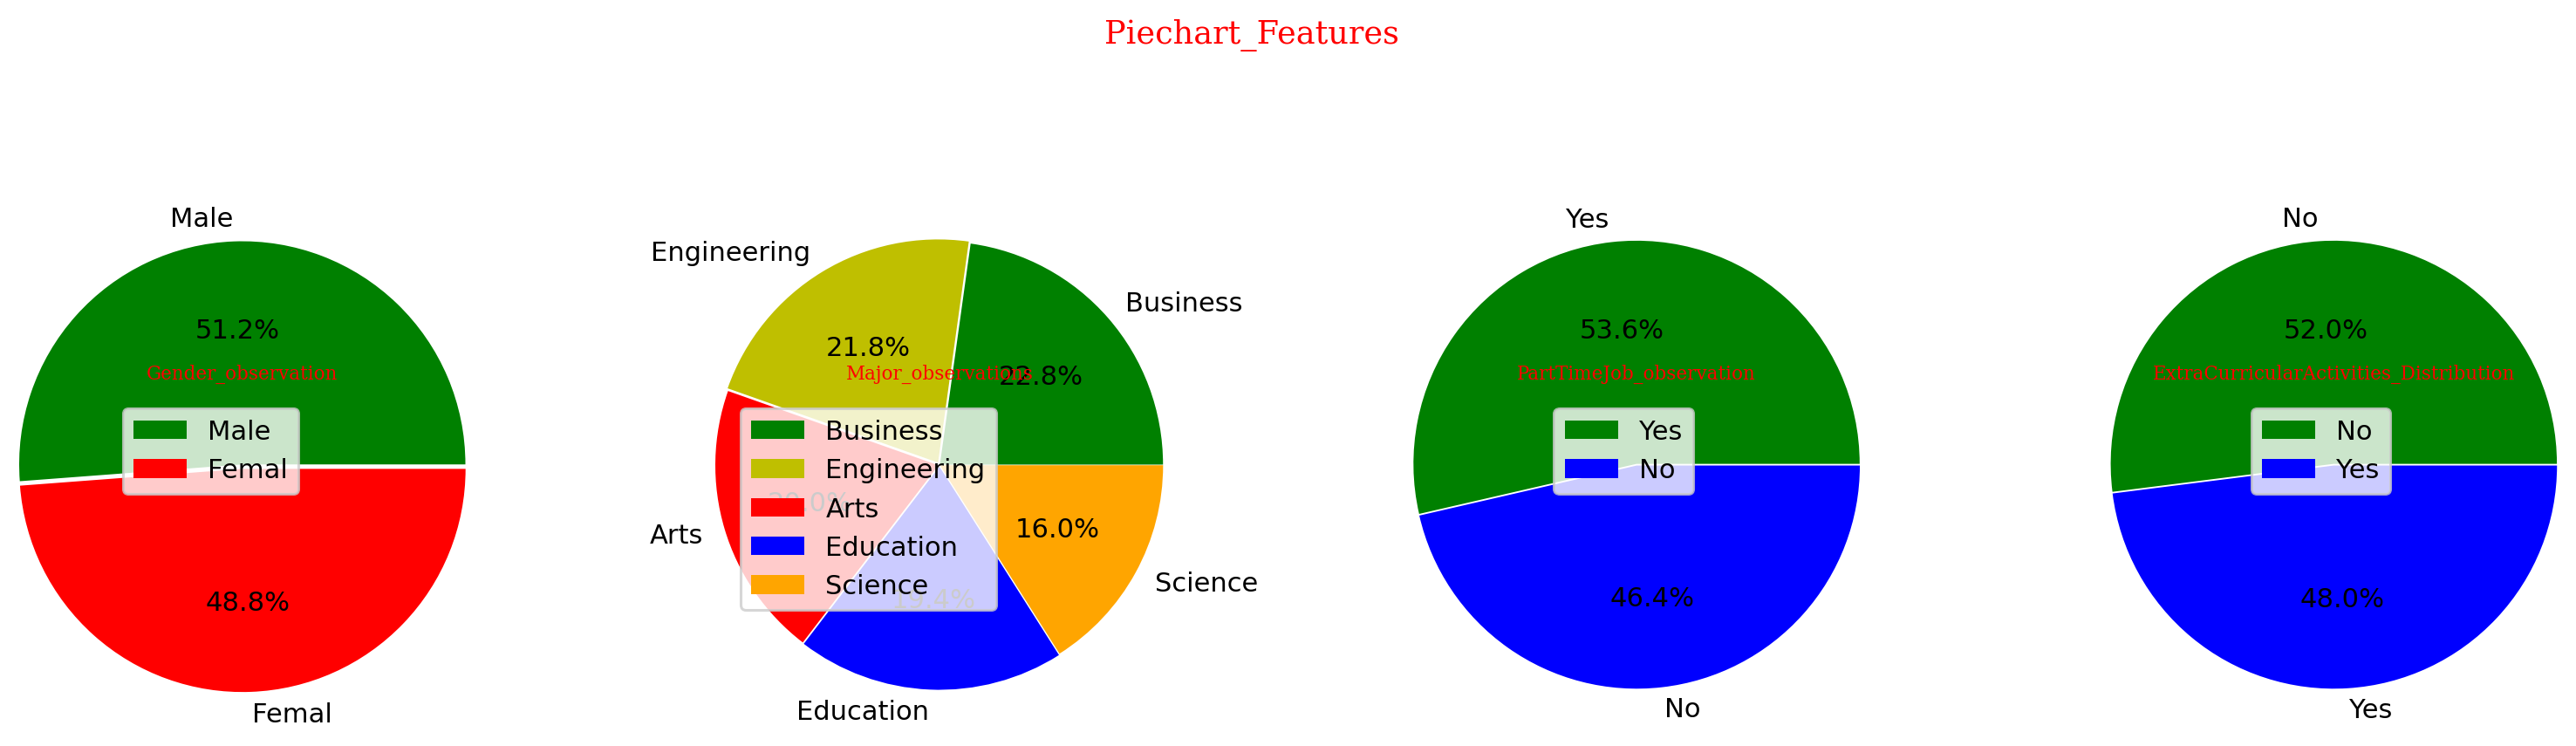

In [15]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 15), dpi=220)
plt.suptitle("Piechart_Features",fontdict=f1)

# Plot 1
Gender = data["Gender"].value_counts()
plt.subplot(4, 4, 1)  # Create the first subplot
plt.title("Gender_observation", fontdict=f1)
plt.pie(
    x=Gender,
    labels=["Male", "Femal"],
    colors=["g","r"],
    explode=[0.01, 0.07],
    autopct='%1.1f%%',
    radius=4,
)
plt.legend()


# Plot 2

Major = data["Major"].value_counts()
plt.subplot(4, 4, 2)  # Create the second subplot
plt.title("Major_observations", fontdict=f1)
plt.pie(
    x=Major,
    labels=['Business','Engineering','Arts','Education','Science'],
    colors=["g","y","r","b","orange"],
    explode=[0.01, 0.05,0.02,0.03,0.01],
    autopct='%1.1f%%',
    radius=4,
)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)
#plot3:

# to observe how many of the Driving_License :

plt.subplot(4,4,3)
PartTimeJob=data["PartTimeJob"].value_counts()
plt.pie(x=PartTimeJob,labels=["Yes","No"],colors=["g","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("PartTimeJob_observation",fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)


#plot4:

# to observe how many of the ExtraCurricularActivities :

plt.subplot(4,4,4)
ExtraCurricularActivities=data["ExtraCurricularActivities"].value_counts()
plt.pie(x=ExtraCurricularActivities,labels=["No","Yes"],colors=["g","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("ExtraCurricularActivities_Distribution",fontdict=f1)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)

plt.show()

In [16]:
import plotly.graph_objects as go

# observation for Gender vs.StudyHoursPerWeek :

x = data["Gender"]
y = data["StudyHoursPerWeek"]

# Create a bar plot using plotly.graph_objects
fig = go.Figure(data=[go.Bar(x=x, y=y,orientation='h')])

# Update the layout
fig.update_layout(title="Observation Gender vs. StudyHoursPerWeek", xaxis_title="Gender", yaxis_title="StudyHoursPerWeek")

# Show the figure
fig.show()


# observation for Gender vs.AttendanceRate

x1 = data["Gender"]
y1 = data["AttendanceRate"]

# Create a bar chart using plotly.express
fig = px.bar(data, x='Gender', y='AttendanceRate', title='Observation Gender vs. AttendanceRate')

# Update the layout
fig.update_layout(xaxis_title="Gender", yaxis_title="AttendanceRate")

# Show the figure
fig.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'StudyHoursPerWeek'}>],
       [<Axes: title={'center': 'AttendanceRate'}>,
        <Axes: title={'center': 'GPA'}>]], dtype=object)

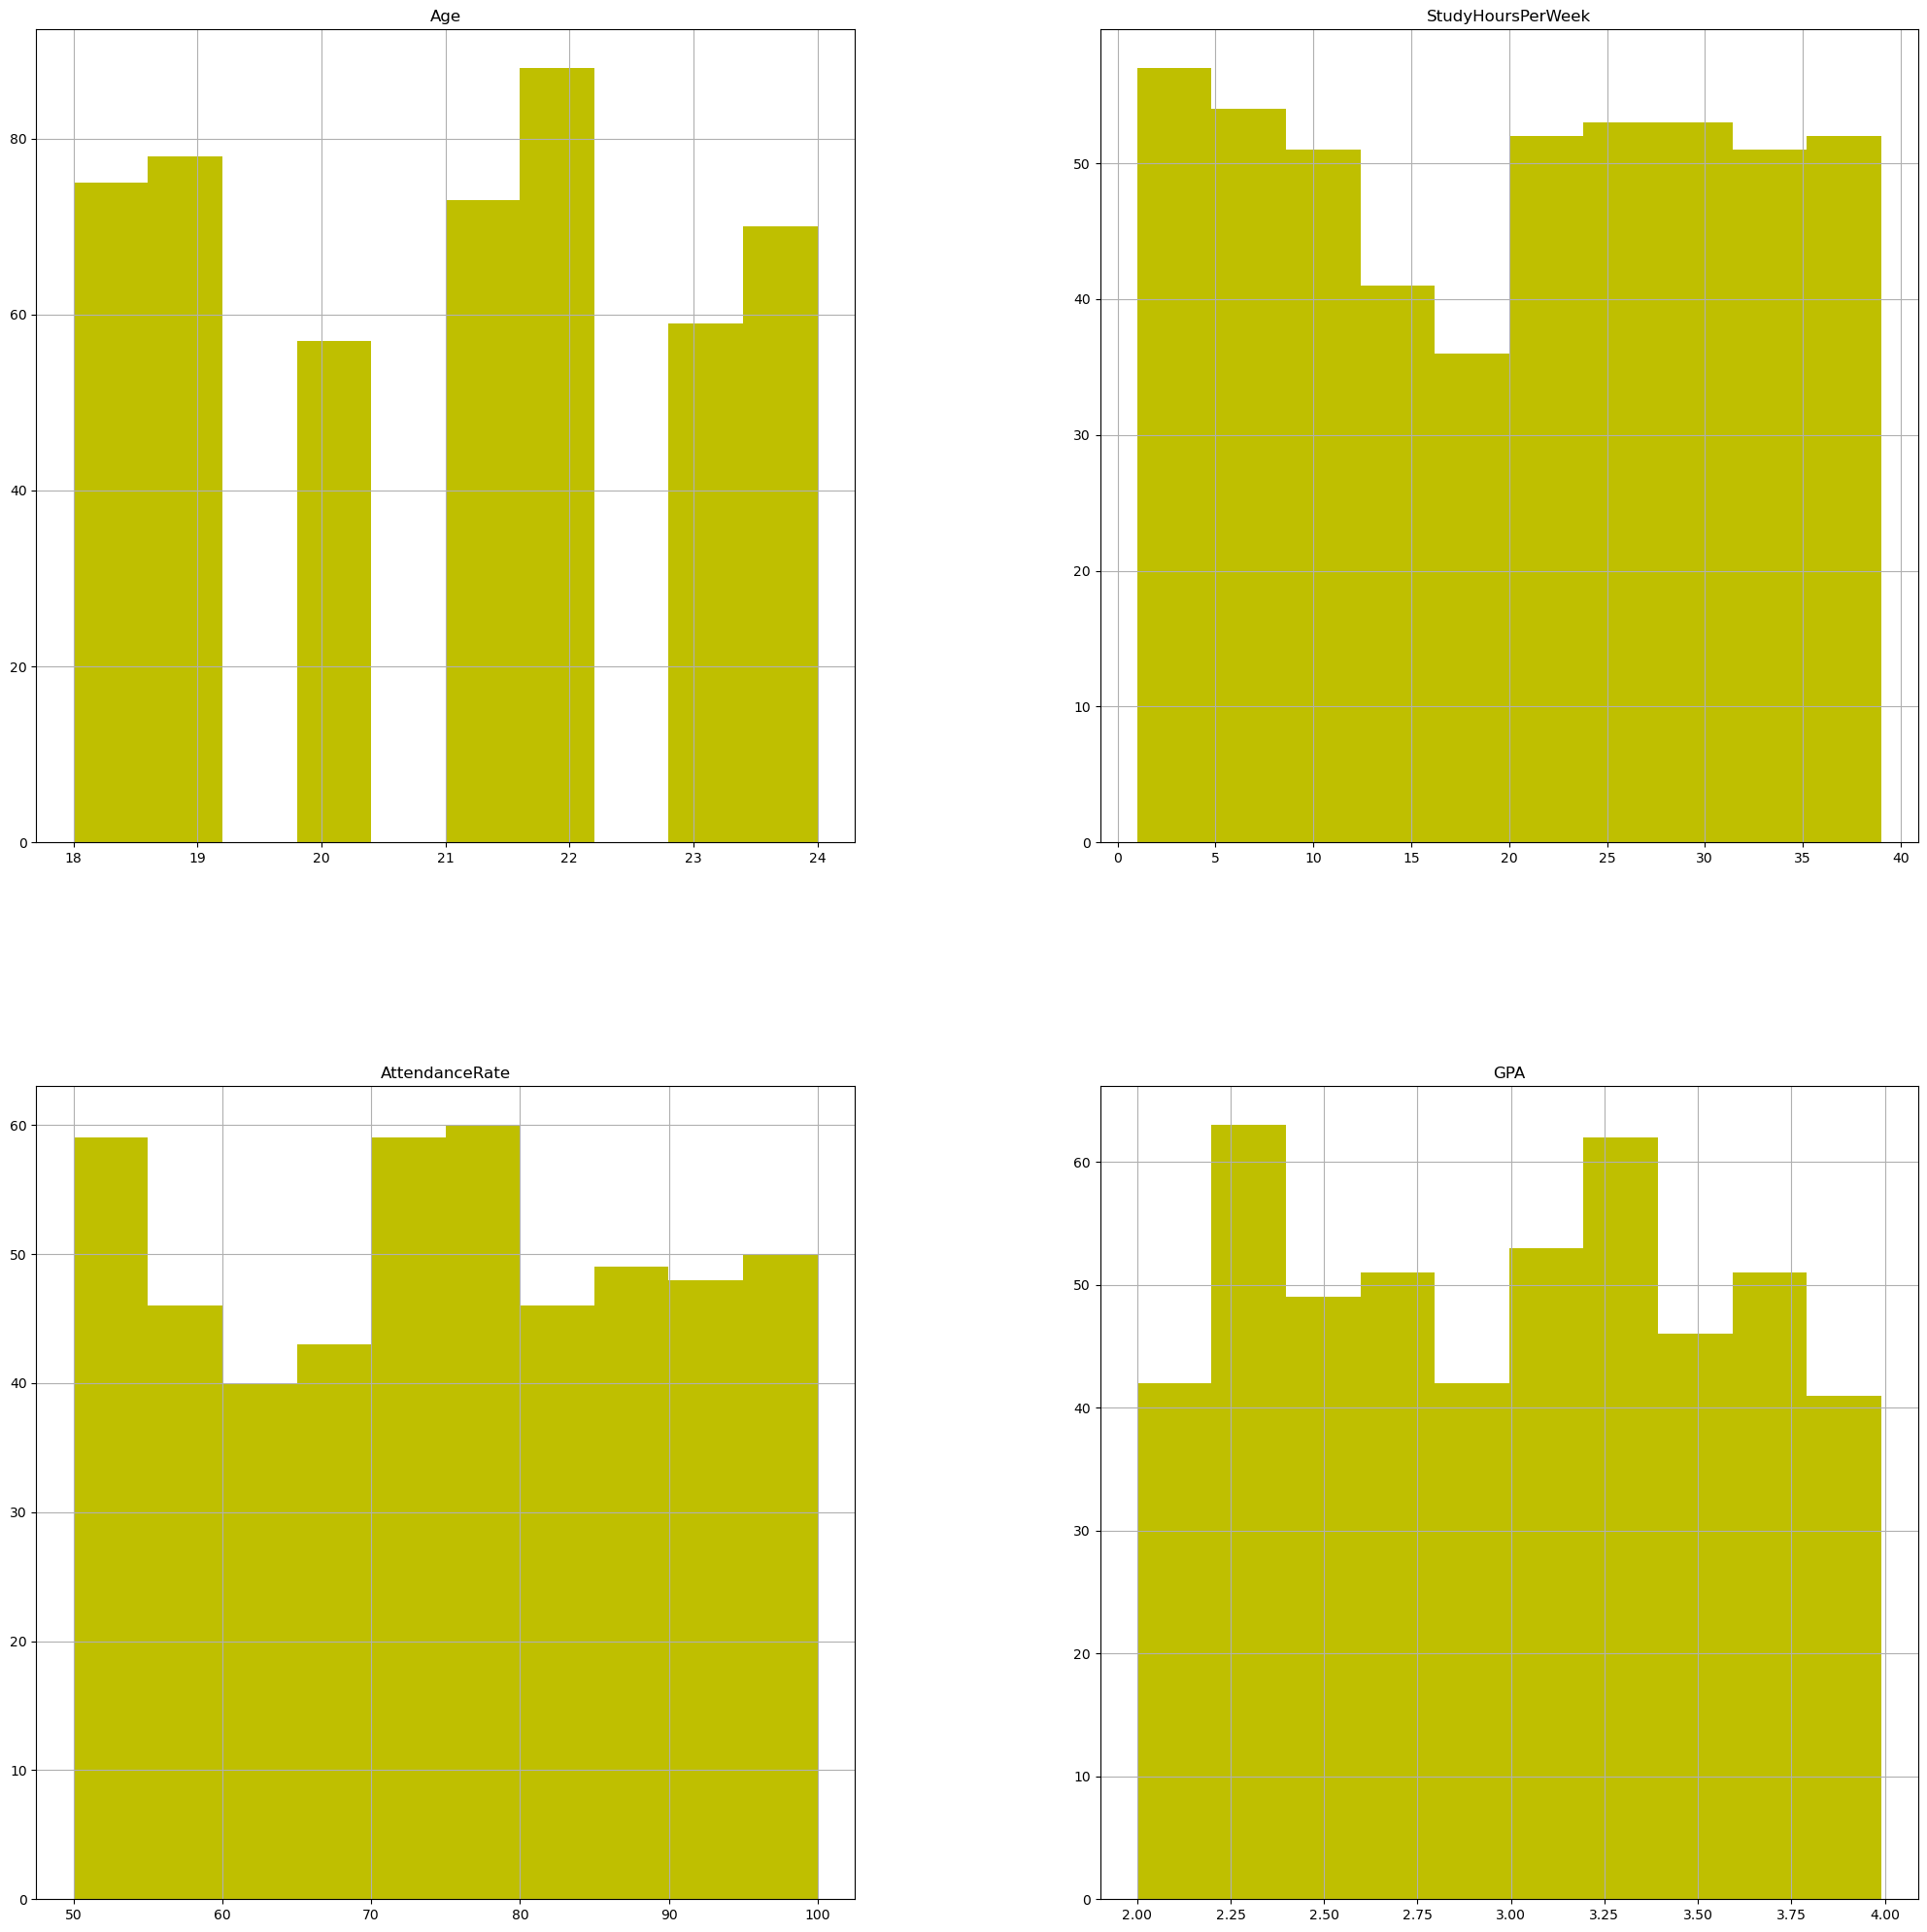

In [17]:
# plot the histgram:
data.hist(figsize=(25,25),color="y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 3600x3000 with 0 Axes>

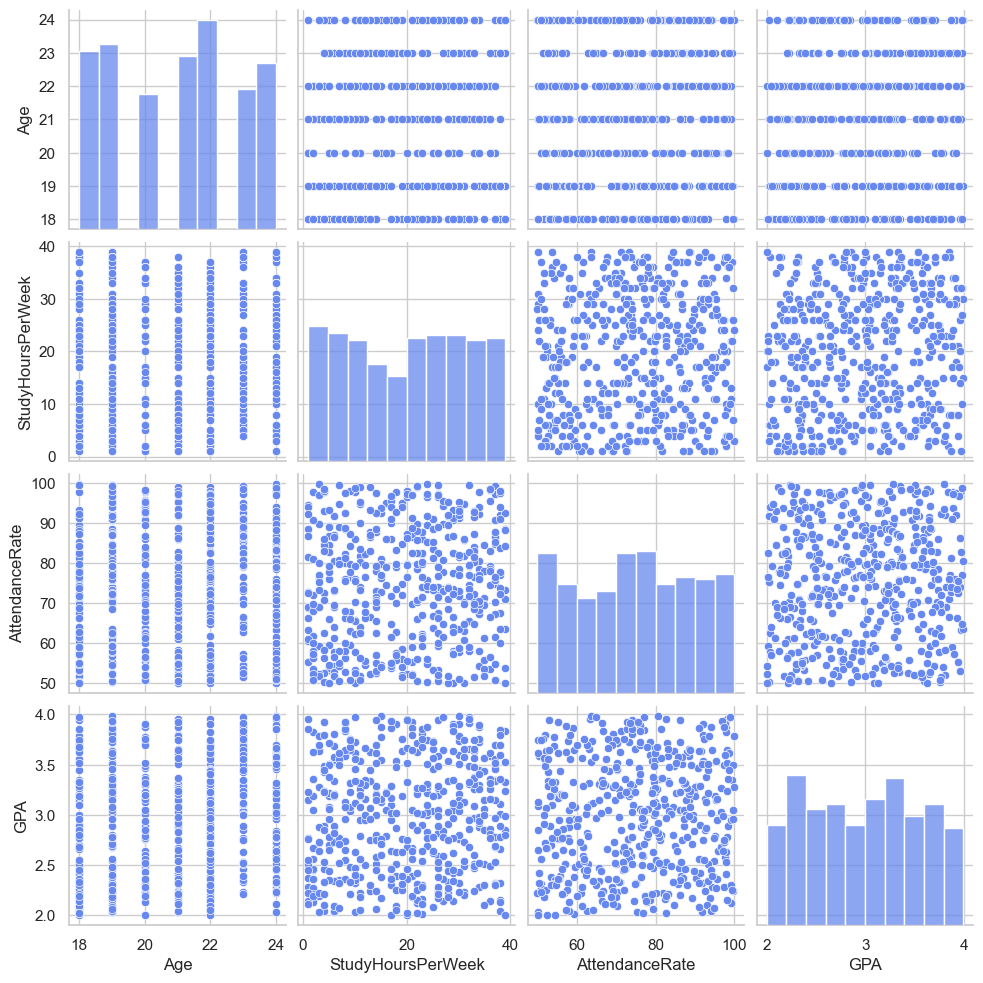

In [18]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



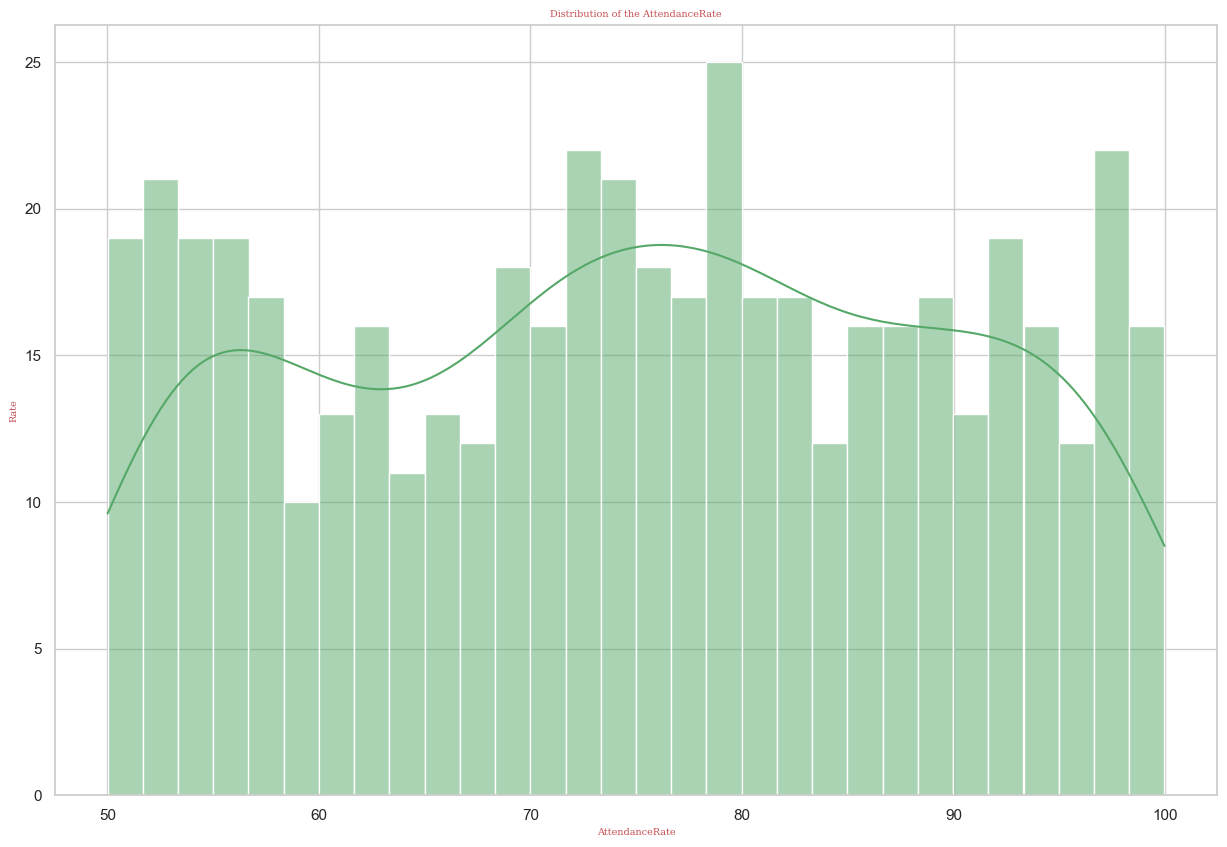

In [19]:
#observe the Vintage distribution:

plt.figure(figsize=(15,10))
plt.title("Distribution of the AttendanceRate",fontdict=f1)
plt.xlabel("AttendanceRate",fontdict=f1)
plt.ylabel("Rate",fontdict=f1)
sns.histplot(data["AttendanceRate"],color="g",bins=30,kde=True,label="AttendanceRate")
plt.show()

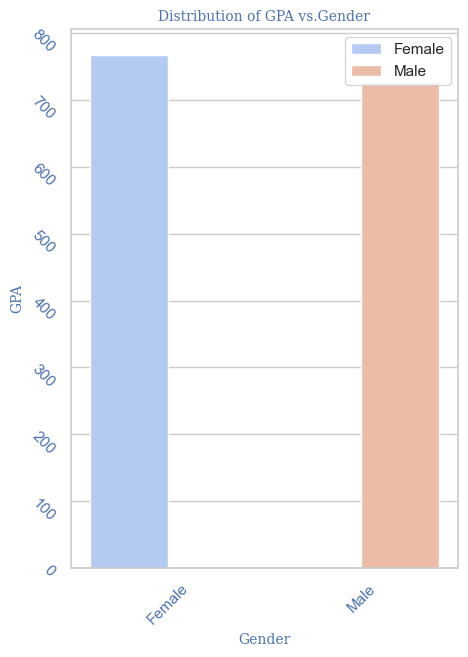

In [20]:
# observe the GPA vs.Gender:

f2={"family":"serif","size":10,"color":"b"}


#barplot 1:

plt.figure(figsize=(5,7))

plt.title("Distribution of GPA vs.Gender",fontdict=f2)
top3=data.groupby("Gender")["GPA"].sum().sort_values(ascending=False)

sns.barplot(x=top3.index,y=top3.values,hue=top3.index,color="r",palette='coolwarm')

plt.xticks(rotation=45,color="b")
plt.xlabel("Gender",fontdict=f2)
plt.ylabel("GPA",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.legend()
plt.show()

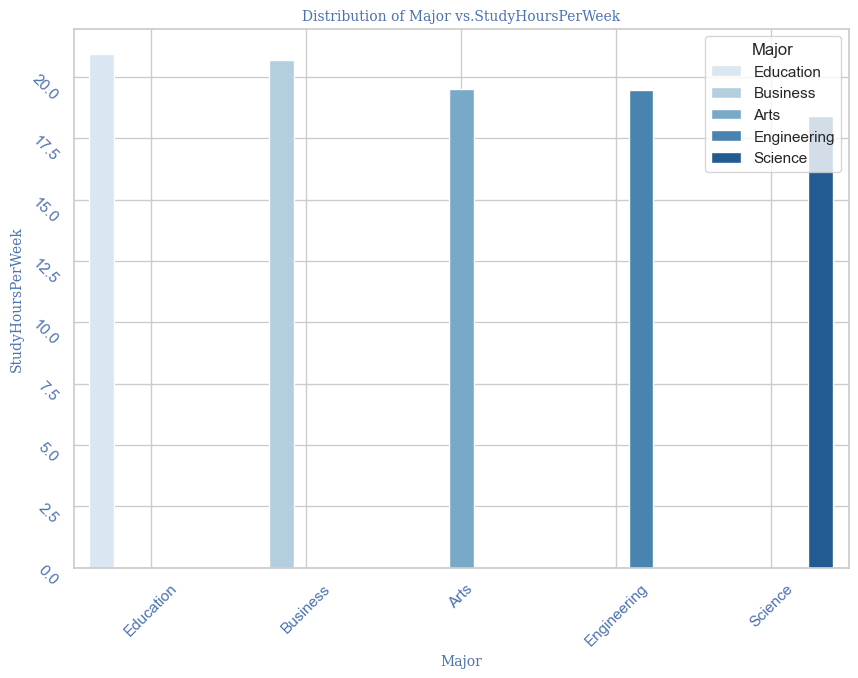

In [21]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Major vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("Major")["StudyHoursPerWeek"].mean().sort_values(ascending=False)
sns.barplot(x=top4.index,y=top4.values,hue=top4.index,color="r",palette='Blues')

plt.xticks(rotation=45,color="b")
plt.xlabel("Major",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



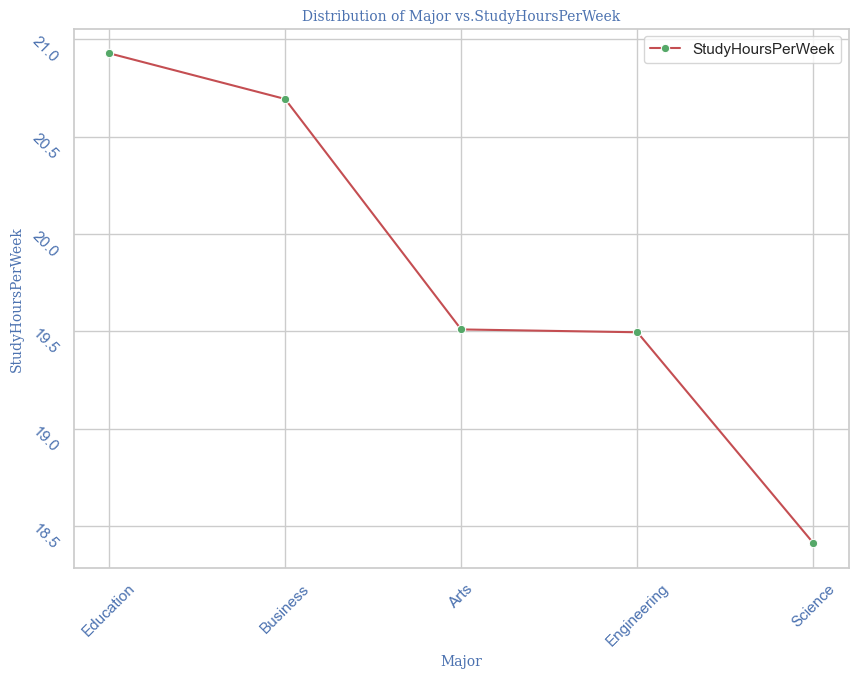

In [22]:
#Lineplot 1 :

plt.figure(figsize=(10,7))
plt.title("Distribution of Major vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("Major")["StudyHoursPerWeek"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="StudyHoursPerWeek",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("Major",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

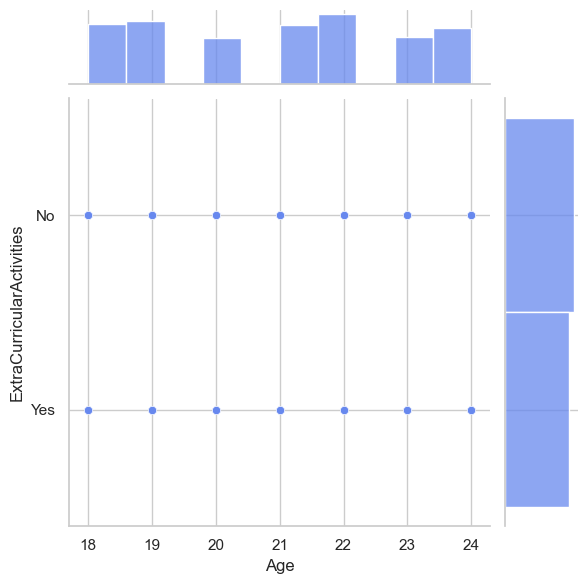

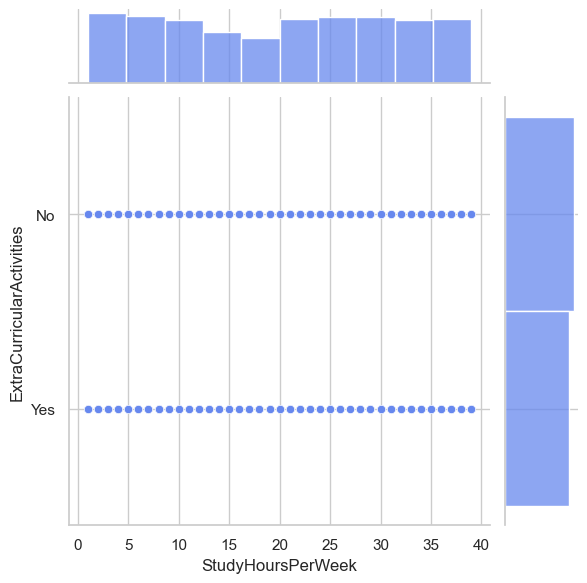

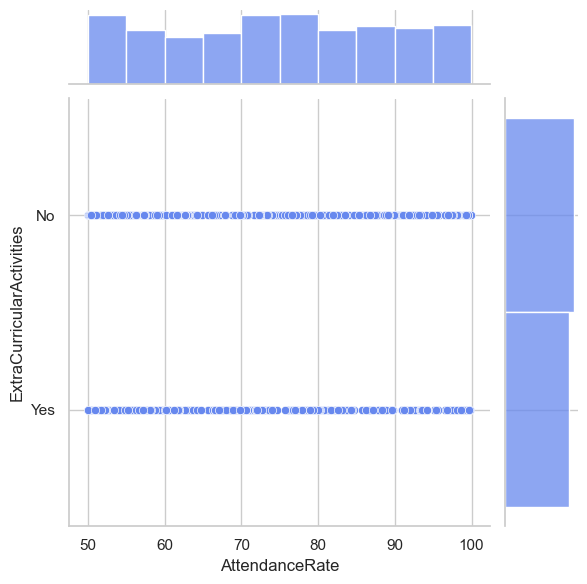

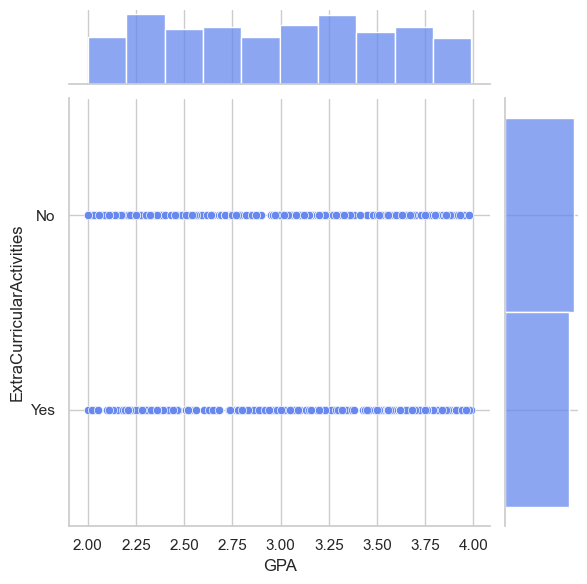

In [23]:
for col in data.select_dtypes("number"):
    if col !="ExtraCurricularActivities":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["ExtraCurricularActivities"],kind="scatter")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to

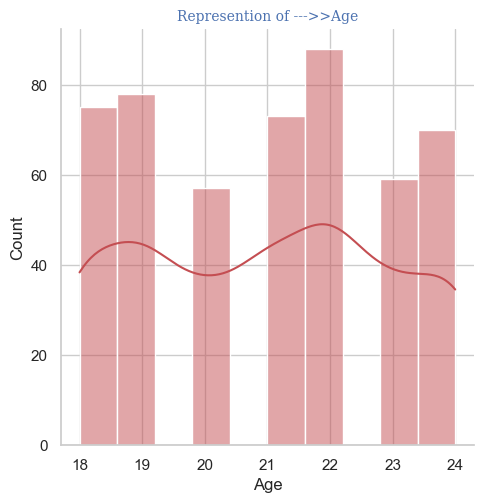

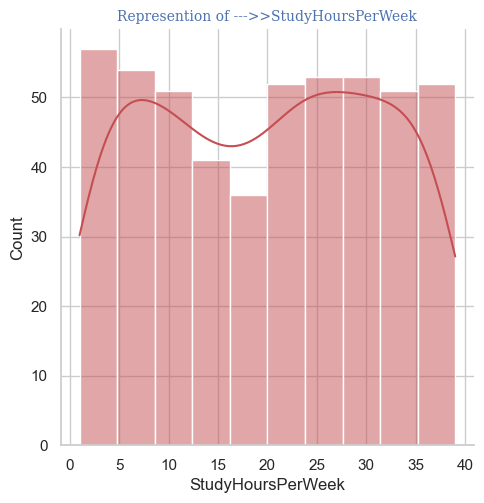

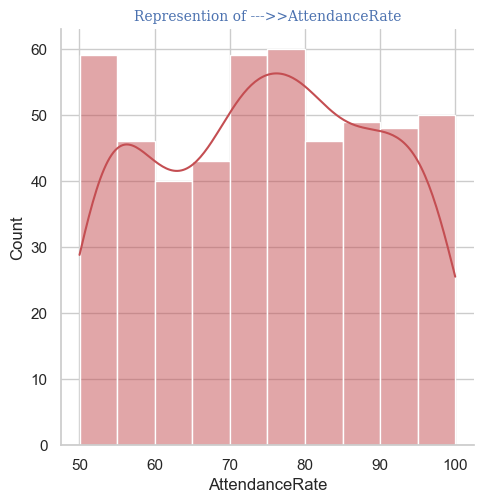

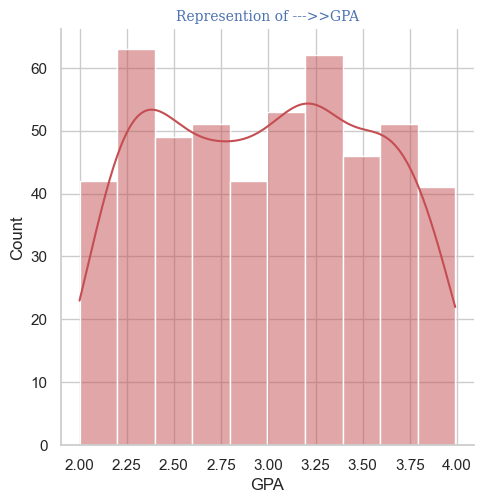

In [24]:
for col in data.select_dtypes(include="float64").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



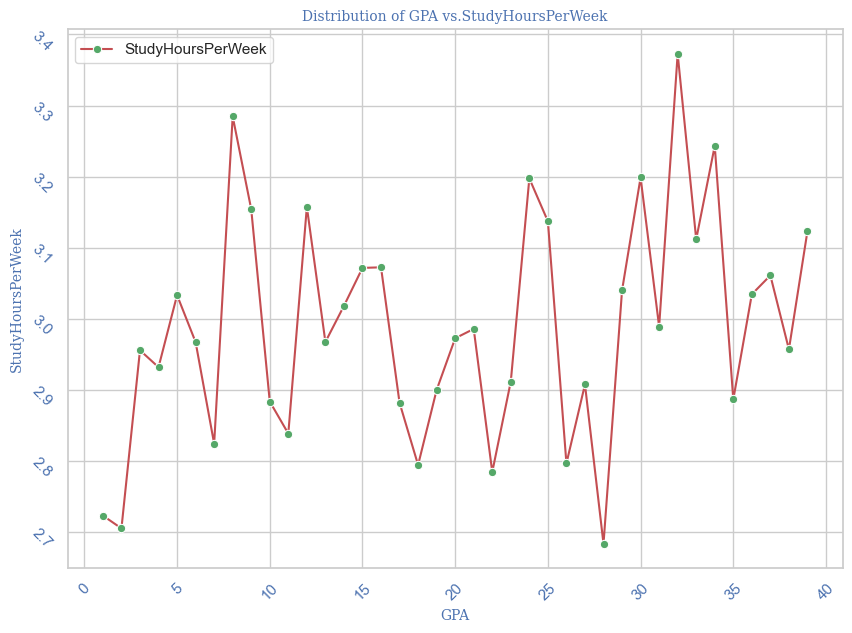

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



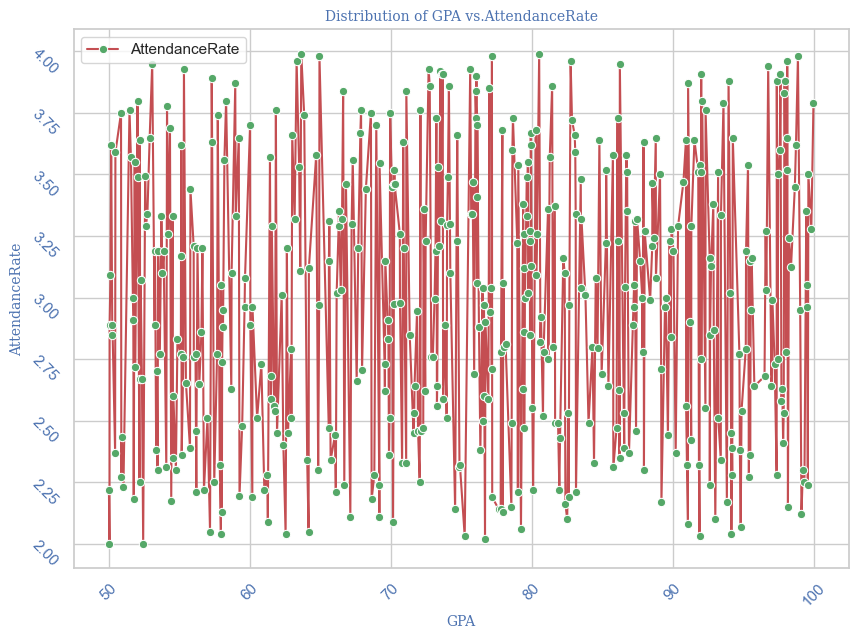

In [25]:
# observation between GPA vs.StudyHoursPerWeek :

plt.figure(figsize=(10,7))
plt.title("Distribution of GPA vs.StudyHoursPerWeek",fontdict=f2)

top4=data.groupby("StudyHoursPerWeek")["GPA"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="StudyHoursPerWeek",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("GPA",fontdict=f2)
plt.ylabel("StudyHoursPerWeek",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()

# observation between GPA vs.AttendanceRate

plt.figure(figsize=(10,7))
plt.title("Distribution of GPA vs.AttendanceRate",fontdict=f2)

top4=data.groupby("AttendanceRate")["GPA"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="AttendanceRate",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("GPA",fontdict=f2)
plt.ylabel("AttendanceRate",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()

# Data processing and Training :(convert Categorical , Labelencoder,StandardScaler)

In [26]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data   

Gender  Age  StudyHoursPerWeek  AttendanceRate  GPA  Major  PartTimeJob  \
0         1    6                 36             379  136      0            1   
1         0    4                 36             226   30      2            0   
2         1    4                  9              35   36      1            0   
3         1    6                  9             177  135      4            1   
4         1    0                 18             225   29      2            1   
..      ...  ...                ...             ...  ...    ...          ...   
495       1    4                 36             243   92      4            0   
496       1    5                 10              67  113      4            0   
497       0    2                  5              70  113      4            0   
498       1    4                 17              73    5      1            0   
499       0    6                 20             436   60      3            0   

     ExtraCurricularActivities  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
..                         ...  
495                          0  
496                          0  
497                          1  
498                          1  
499                          0  

[500 rows x 8 columns]

In [27]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

Gender       Age  StudyHoursPerWeek  AttendanceRate       GPA  \
0    1.024295  1.523131           1.494258        1.071923  0.843351   
1   -0.976281  0.522388           1.494258       -0.049243 -1.204555   
2    1.024295  0.522388          -0.861790       -1.448869 -1.088636   
3    1.024295  1.523131          -0.861790       -0.408310  0.824031   
4    1.024295 -1.479098          -0.076441       -0.056571 -1.223875   
..        ...       ...                ...             ...       ...   
495  1.024295  0.522388           1.494258        0.075331 -0.006723   
496  1.024295  1.022759          -0.774529       -1.214377  0.398994   
497 -0.976281 -0.478355          -1.210834       -1.192393  0.398994   
498  1.024295  0.522388          -0.163702       -1.170409 -1.687551   
499 -0.976281  1.523131           0.098081        1.489612 -0.624959   

        Major  PartTimeJob  ExtraCurricularActivities  
0   -1.393789     0.930415                  -0.960769  
1    0.065676    -1.074789                  -0.960769  
2   -0.664057    -1.074789                  -0.960769  
3    1.525141     0.930415                  -0.960769  
4    0.065676     0.930415                  -0.960769  
..        ...          ...                        ...  
495  1.525141    -1.074789                  -0.960769  
496  1.525141    -1.074789                  -0.960769  
497  1.525141    -1.074789                   1.040833  
498 -0.664057    -1.074789                   1.040833  
499  0.795409    -1.074789                  -0.960769  

[500 rows x 8 columns]

# Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

In [28]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [29]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)

In [30]:
transform=Var_Selector(data)
transform.fit_transform(data)

Gender  Age  StudyHoursPerWeek  AttendanceRate  GPA  Major  PartTimeJob  \
0         1    6                 36             379  136      0            1   
1         0    4                 36             226   30      2            0   
2         1    4                  9              35   36      1            0   
3         1    6                  9             177  135      4            1   
4         1    0                 18             225   29      2            1   
..      ...  ...                ...             ...  ...    ...          ...   
495       1    4                 36             243   92      4            0   
496       1    5                 10              67  113      4            0   
497       0    2                  5              70  113      4            0   
498       1    4                 17              73    5      1            0   
499       0    6                 20             436   60      3            0   

     ExtraCurricularActivities  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
..                         ...  
495                          0  
496                          0  
497                          1  
498                          1  
499                          0  

[500 rows x 8 columns]

In [31]:
# Check if there are aduplicated values in the data:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [32]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()

print("Correlation -->>"+"\n",corr)
print("-"*50)

sperman=data.select_dtypes("number").corr(method="spearman")
print("sperman -->>"+"\n",sperman)
print("-"*50)
pearson=data.select_dtypes("number").corr(method="pearson")
print("pearson -->>"+"\n",pearson)
print("-"*50)
kendall=data.select_dtypes("number").corr(method="kendall")
print("kendall -->>"+"\n",kendall)

Correlation -->>
                              Gender       Age  StudyHoursPerWeek  \
Gender                     1.000000  0.081556          -0.013178   
Age                        0.081556  1.000000          -0.015695   
StudyHoursPerWeek         -0.013178 -0.015695           1.000000   
AttendanceRate            -0.064758  0.035067           0.090472   
GPA                       -0.019164  0.096896           0.092482   
Major                     -0.005956  0.069391          -0.037643   
PartTimeJob                0.009756 -0.028511          -0.010767   
ExtraCurricularActivities -0.065031  0.011137           0.003409   

                           AttendanceRate       GPA     Major  PartTimeJob  \
Gender                          -0.064758 -0.019164 -0.005956     0.009756   
Age                              0.035067  0.096896  0.069391    -0.028511   
StudyHoursPerWeek                0.090472  0.092482 -0.037643    -0.010767   
AttendanceRate                   1.000000  0.059525 -0.00

(0.0, 192.15)

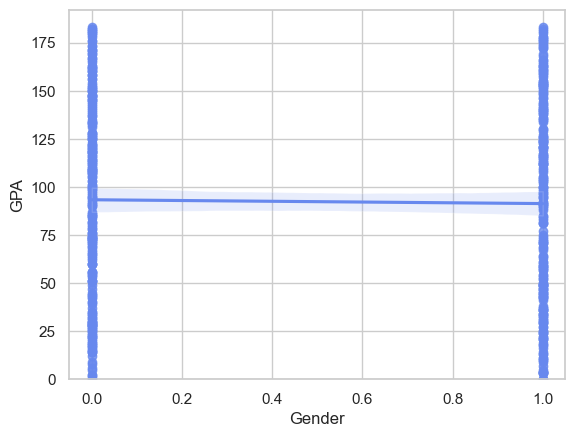

In [33]:
# No Rellation  Found between Gender & GPA :
sns.regplot(x=data["Gender"],y=data["GPA"])
plt.ylim(0,)

(0.0, 192.15)

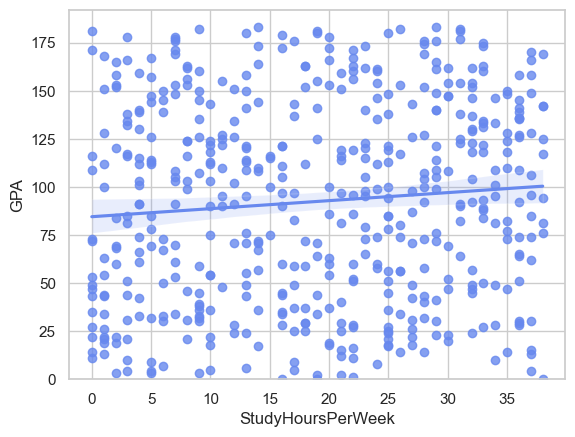

In [34]:
# Type of Relation between StudyHoursPerWeek & GPA  positve Relation:
sns.regplot(x=data["StudyHoursPerWeek"],y=data["GPA"])
plt.ylim(0,)

(0.0, 494.55)

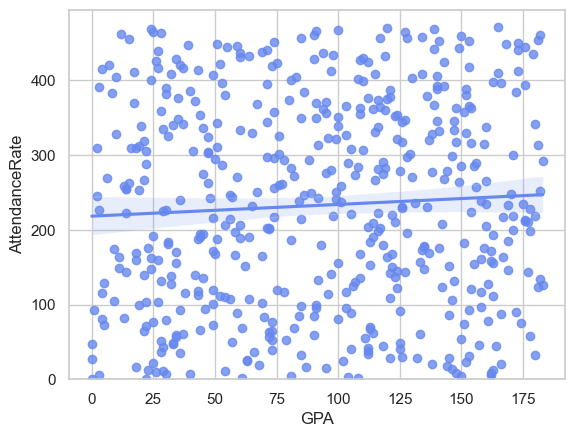

In [35]:
# Type pf Relation between Attendance & GPA is positve :

sns.regplot(x=data["GPA"],y=data["AttendanceRate"])
plt.ylim(0,)

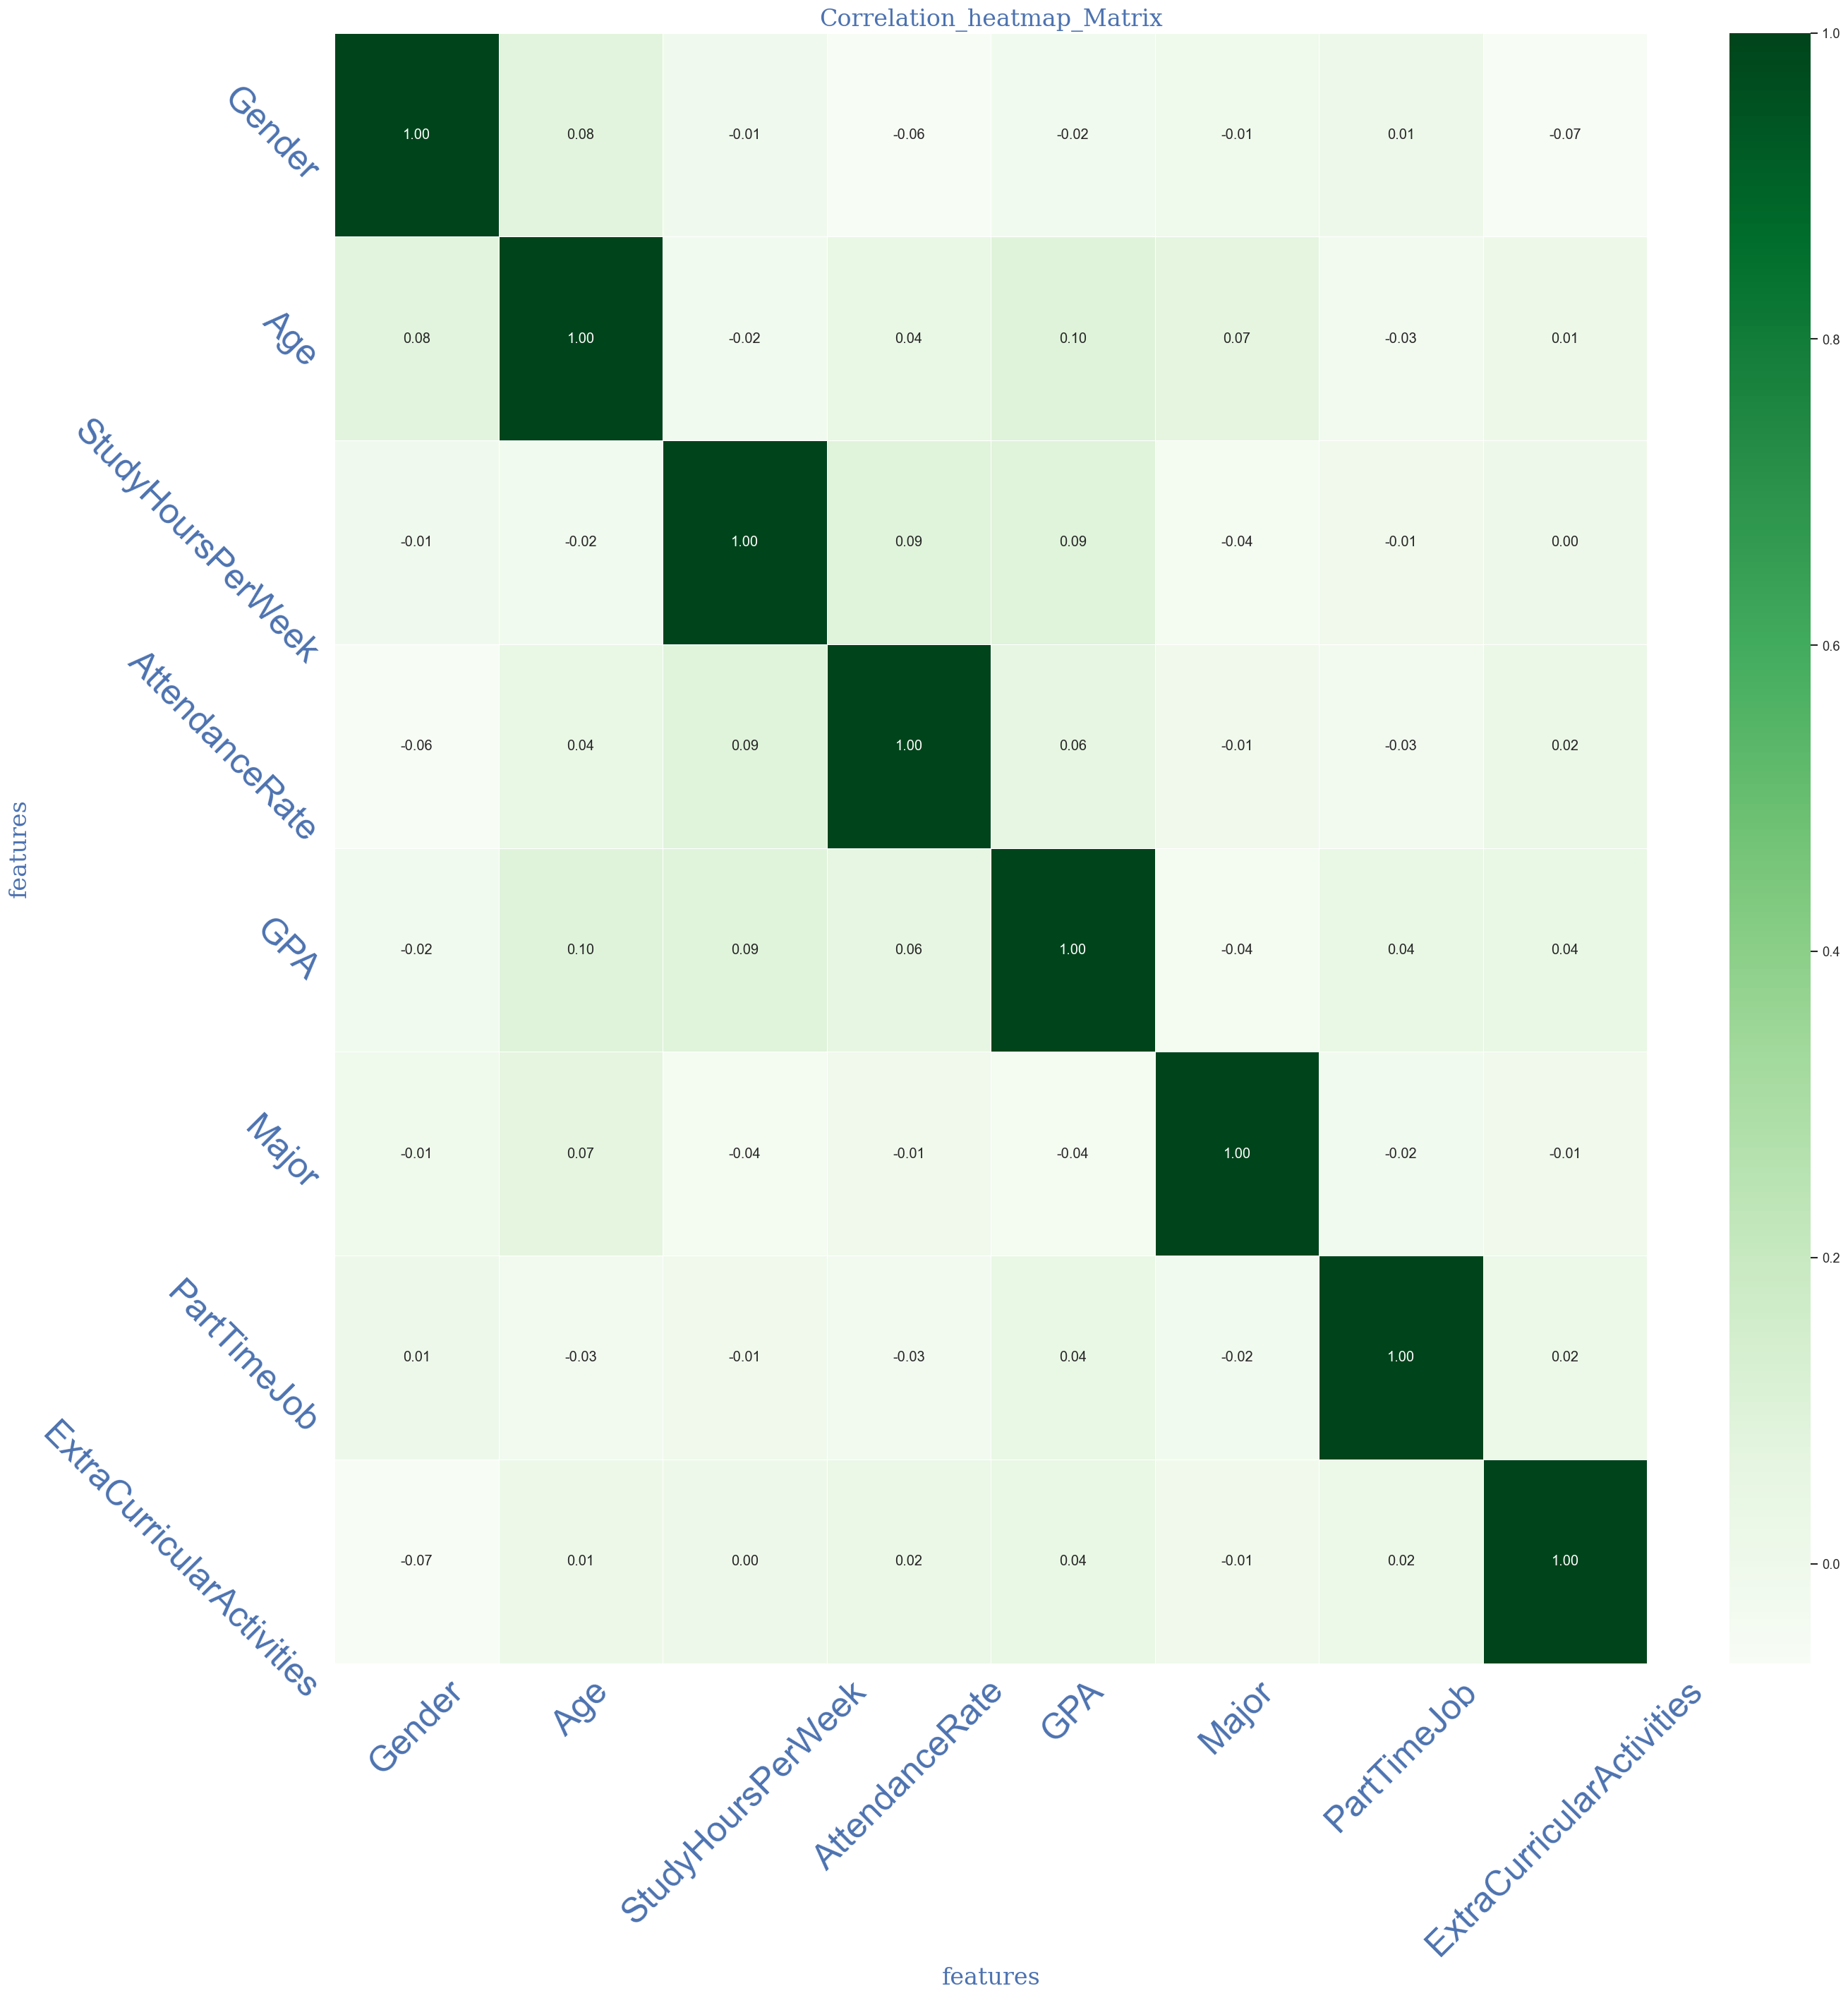

In [39]:
# plot the heatmap_Correlation_Matrix:
f1 = {"family": "serif", "size": 20, "color": "b"}
plt.figure(figsize=(25,25), dpi=120)

# Create heatmap with larger variable fonts
sns.heatmap(data.select_dtypes("number").corr(), annot=True, fmt="0.2f", cmap='Greens', linewidths=0.5)

# Adjust the font size for x and y ticks
plt.xticks(rotation=45, color="b", fontsize=30)
plt.yticks(rotation=-45, color="b", fontsize=30)

# Labels and title
plt.xlabel("features", fontdict=f1)
plt.ylabel("features", fontdict=f1)
plt.title("Correlation_heatmap_Matrix", fontdict=f1)

plt.show()


In [37]:
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Gender feature
Q1 of Gender --->>> 0.0 
 Q3 of Gender ---->>> 1.0 
 iqr--->>1.0
 low_limit--->>>-1.5 
  upper_limit--->>> 2.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in Age feature
Q1 of Age --->>> 1.0 
 Q3 of Age ---->>> 5.0 
 iqr--->>4.0
 low_limit--->>>-5.0 
  upper_limit--->>> 11.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in StudyHoursPerWeek feature
Q1 of StudyHoursPerWeek --->>> 9.0 
 Q3 of StudyHoursPerWeek ---->>> 29.0 
 iqr--->>20.0
 low_limit--->>>-21.0 
  upper_limit--->>> 59.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in AttendanceRate feature
Q1 of AttendanceRate --->>> 116.75 
 Q3 of AttendanceRate ---->>> 350.25 
 iqr--->>233.5
 low_limit--->>>-233.5 
  upper_limit--->>> 700.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> th

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


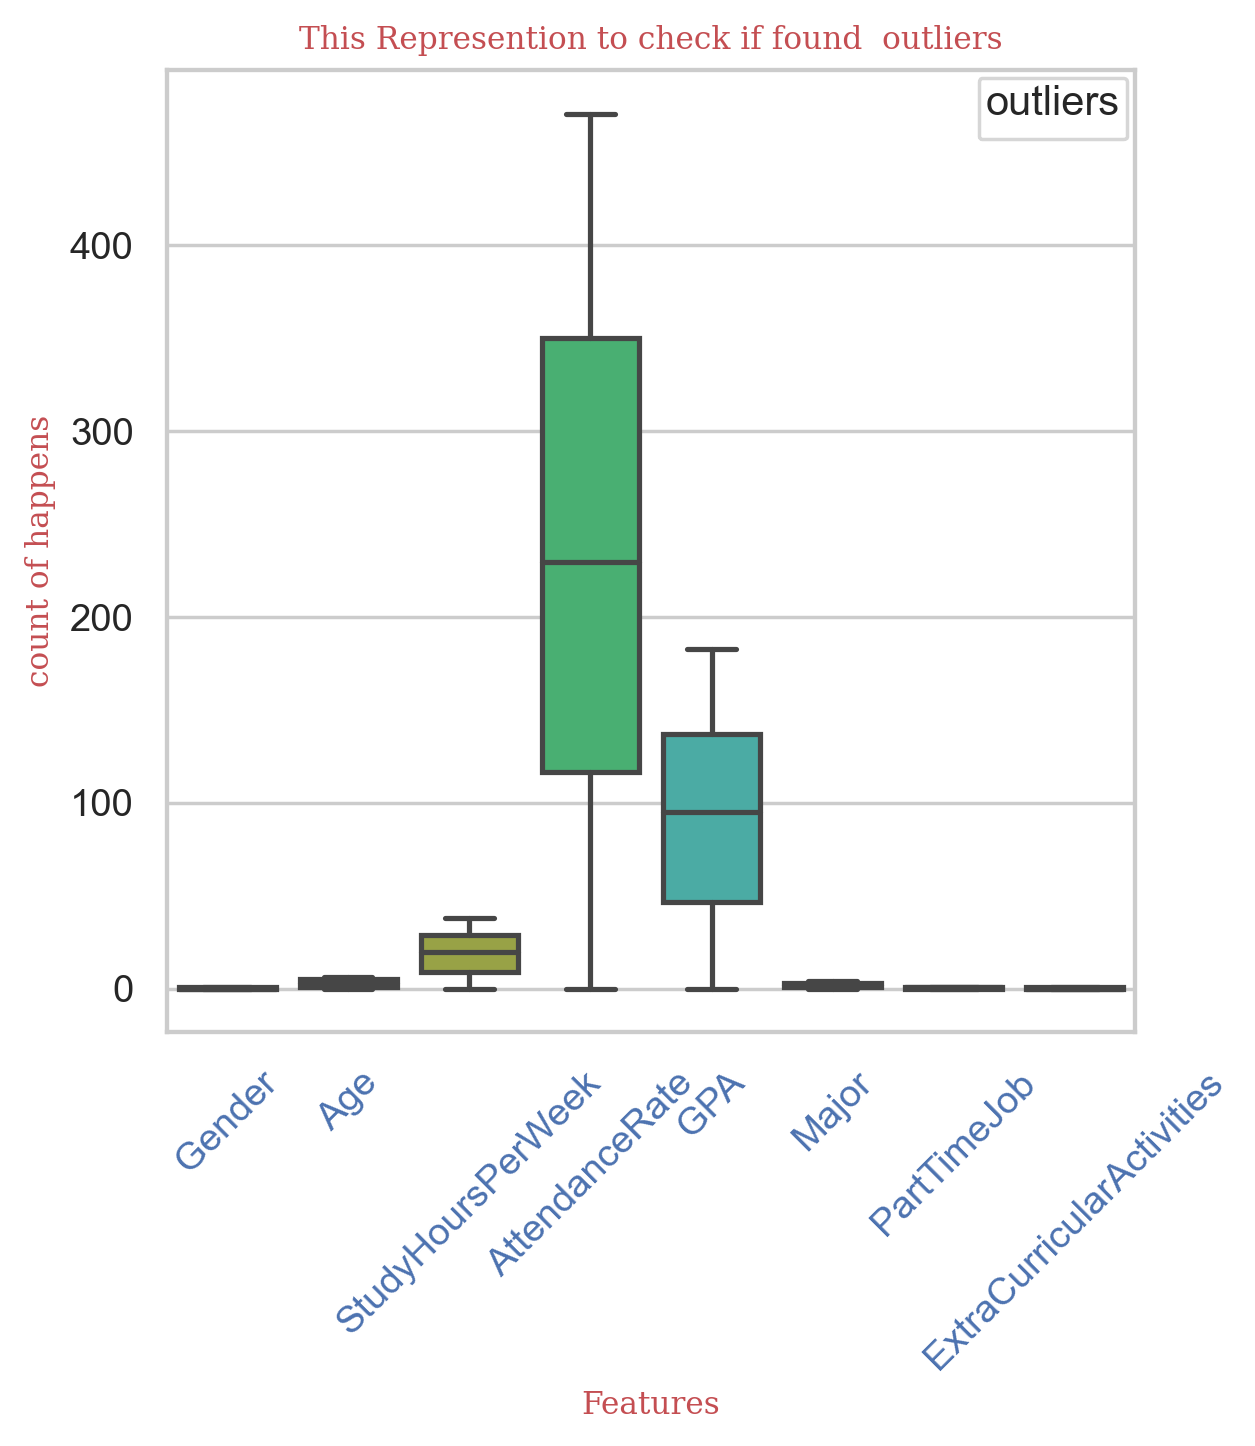

In [55]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  8.957550901763053
lower_limit :  -3.0455509017630535
Mean Value :  2.956
Median Value :  3.0
1st Standard Deviation :  2.000516967254351


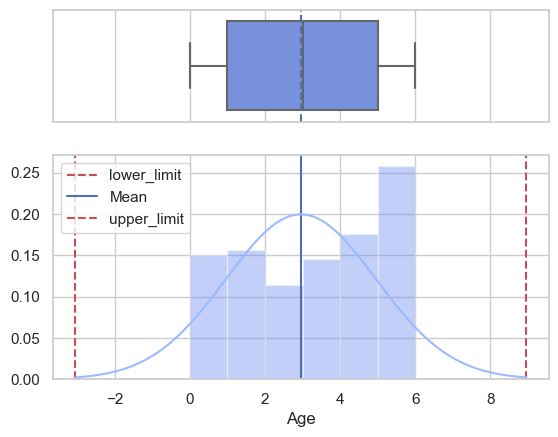

In [56]:
#Another way to calculate outlier on Age feature:-
# NO Outlier in Feature Age:

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

upper_limit :  53.29004173498187
lower_limit :  -15.53804173498187
Mean Value :  18.876
Median Value :  19.5
1st Standard Deviation :  11.471347244993957


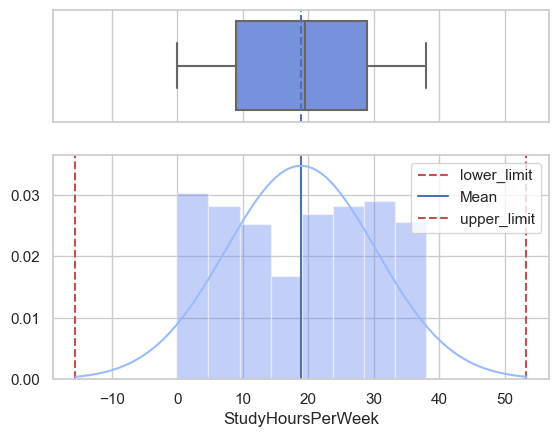

In [57]:
#Another way to calculate outlier on Age feature:-
# NO Outlier in Feature StudyHoursPerWeek:

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.StudyHoursPerWeek.mean()
std = data.StudyHoursPerWeek.std()
median = data.StudyHoursPerWeek.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["StudyHoursPerWeek"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["StudyHoursPerWeek"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [58]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0),data["ExtraCurricularActivities"])

SelectKBest(k=5)

In [59]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0).columns)

In [60]:
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

pvalues     score              input
0  0.146493  2.114986             Gender
1  0.803810  0.061778                Age
2  0.939383  0.005789  StudyHoursPerWeek
3  0.595069  0.282862     AttendanceRate
4  0.380212  0.771388                GPA
5  0.875733  0.024480              Major
6  0.672598  0.178789        PartTimeJob

In [61]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0),data["ExtraCurricularActivities"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="ExtraCurricularActivities").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

Gender               0.000000
Age                  0.000000
StudyHoursPerWeek    0.000000
GPA                  0.008192
PartTimeJob          0.015059
Major                0.031090
AttendanceRate       0.057280
dtype: float64